In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from imblearn.over_sampling import SMOTE

In [59]:
# 1. Load dataset
data= pd.read_csv("dataCleaned.csv")
data.columns=data.columns.str.strip()
X = data.drop("Attrition", axis=1) 
y = data["Attrition"]

In [60]:
# 2. Split dataset 
 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.2, random_state=42 
) 

In [61]:
# 3. Scaling 
 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [62]:
# التعامل مع الـ Imbalance باستخدام SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [63]:
# 4. Train KNN 
 
k = 5
knn = KNeighborsClassifier(n_neighbors=k) 
knn.fit(X_res, y_res) 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [64]:
# 5. Predict and evaluate 
 
y_pred = knn.predict(X_test) 
 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 

Accuracy: 0.6700680272108843

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       255
           1       0.20      0.51      0.29        39

    accuracy                           0.67       294
   macro avg       0.55      0.60      0.54       294
weighted avg       0.81      0.67      0.72       294

Confusion Matrix:
 [[177  78]
 [ 19  20]]


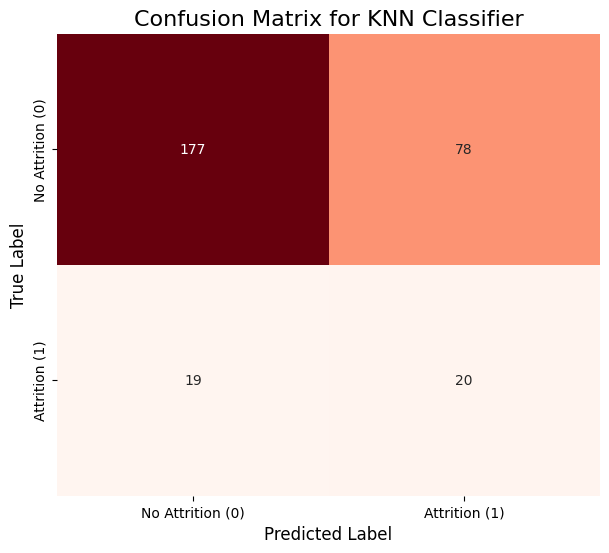

In [65]:
# 6. رسم مصفوفة التشويش (Confusion Matrix Heatmap)
 
# حساب مصفوفة التشويش مرة أخرى
cm = confusion_matrix(y_test, y_pred)
 
plt.figure(figsize=(7, 6))
 
# إنشاء خريطة حرارية لمصفوفة التشويش
sns.heatmap(
    cm, 
    annot=True,              # عرض الأرقام داخل المربعات
    fmt='d',                 # تنسيق الأرقام كأعداد صحيحة
    cmap='Reds',            # استخدام نظام الألوان الأزرق
    cbar=False,              # عدم عرض شريط الألوان الجانبي
    xticklabels=['No Attrition (0)', 'Attrition (1)'],  # تسميات المحور السيني (Predicted)
    yticklabels=['No Attrition (0)', 'Attrition (1)']   # تسميات المحور الصادي (Actual)
)
 
plt.title('Confusion Matrix for KNN Classifier', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()